![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [711]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [712]:
# display info
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


Berdasarkan .info() diperoleh terdapat beberapa fitur yang mengandung data yang hilang, yaitu 'Vict Sex', 'Vict Descent', dan 'Weapon Desc'.

In [713]:
# descriptive statistics numeric features
crimes.describe()

,DR_NO,Vict Age
count,2.479880e+05,247988.000000
mean,2.256571e+08,29.954764
std,5.042345e+06,21.901016
min,2.203000e+03,-2.000000
25%,2.210130e+08,0.000000
50%,2.220131e+08,31.000000
75%,2.310058e+08,45.000000
max,2.399165e+08,99.000000


Perhatikan, pada fitur 'Vict Age' terdapat suatu anomali yaitu usia korban minimum -2 (negatif) yang mana hal tersebut tidak mungkin.

In [714]:
print(len(crimes[crimes['Vict Age'] < 0]))

33


Diperoleh terdapat 33 baris data dengan nilai 'Vict Age' merupakan bilangan negatif. Lebih lanjut, untuk proses analisis selanjutnya dilakukan untuk baris-baris data yang anomali tersebut.

In [715]:
# descriptive statistics categorycal features
crimes.describe(include='O')

,TIME OCC,AREA NAME,Crm Cd Desc,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
count,247988,247988,247988,215740,215739,80087,247988,247988
unique,1439,21,110,5,20,74,6,43667
top,1200,Central,VEHICLE - STOLEN,M,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,10200 SANTA MONICA BL
freq,8333,18732,25797,101028,75350,42115,210171,647


In [716]:
# # Drop for 'Vict Age' feature with negative values
# crimes[crimes['Vict Age'] < 0]['Vict Age'] = 0

1. Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

In [717]:
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M')

crimes['Hours'] = crimes['TIME OCC'].apply(lambda x: x.hour)
crimes['Minutes'] = crimes['TIME OCC'].apply(lambda x: x.minute)

In [718]:
print(crimes[['Hours','Minutes']].dtypes)

Hours      int64
Minutes    int64
dtype: object


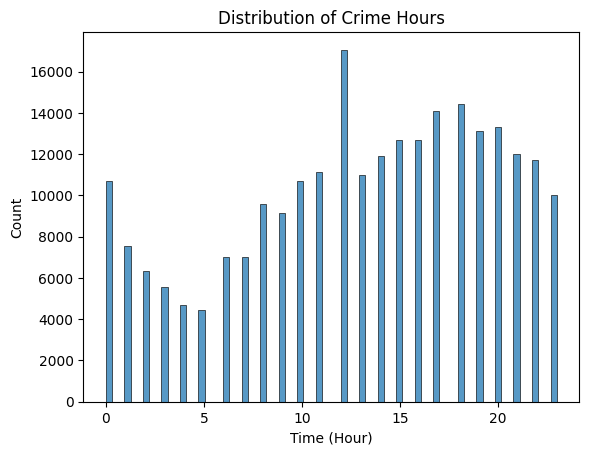

In [719]:
sns.histplot(x='Hours', data=crimes)
plt.title('Distribution of Crime Hours')
plt.xlabel('Time (Hour)')
plt.ylabel('Count')

plt.show()

In [720]:
peak_crime_hour = crimes['Hours'].mode()[0]
print(f"Hours with the highest crime frequency: {peak_crime_hour}")

Hours with the highest crime frequency: 12


2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [721]:
start_hour = 20             #10pm inclusive
end_hour = 4                #4pm exclusive equivalent with 3:59am inclusive

crime_night = crimes[(crimes['Hours']>=start_hour)\
                     |(crimes['Hours']<end_hour)]

In [722]:
peak_night_crime_location = crime_night['AREA NAME'].mode()[0]
print(f"Areas with the highest crime frequency: {peak_night_crime_location}")

Areas with the highest crime frequency: Central


3. Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

In [723]:
age_bins = [0, 18, 26, 35, 45, 55, 65, 100]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=False)

In [724]:
victim_ages = crimes['Age Group'].value_counts(dropna=False)
print(victim_ages)

0-17     66768
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
NaN         33
Name: Age Group, dtype: int64
